# Linear Sequential Estimation

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)

In [139]:
# Import functions directly from github
# Important: note that we use raw.githubusercontent.com, not github.com

# import requests
# url = 'https://raw.githubusercontent.com/florisvb/Nonlinear_and_Data_Driven_Estimation/main/Utility/plot_utility.py'
# r = requests.get(url)

# # Store the file to the colab working directory
# with open('plot_utility.py', 'w') as f:
#     f.write(r.text)



import sys
sys.path.append('../Utility') # provide path to the utility functions
# import the function we want from that file
from plot_utility import plot_tme

# Generate sample time series data

In [140]:
t = np.linspace(0, 6, 500)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

# Add some normal (gaussian) noise

In [141]:
# Example for Gaussian (normal) random variable

noise_mean = 0
noise_std = 0.5

v = np.column_stack(np.random.normal(noise_mean, noise_std, len(y))).T

In [142]:
y_tilde = y+v

# Plotting

<Axes: xlabel='Time', ylabel='y'>

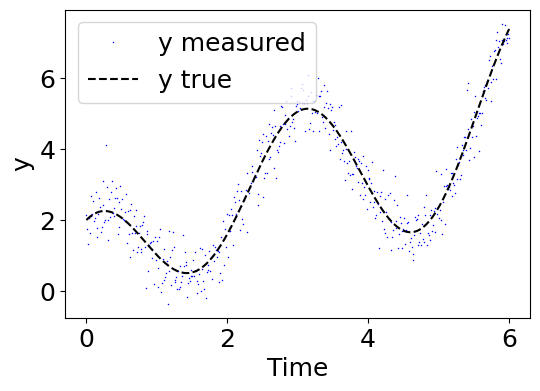

In [143]:
plot_tme(t, y, y_tilde)

# Candidate models

In [148]:
model_1_H = np.vstack([t, np.sin(t), np.cos(2*t)]).T
model_1_H.shape

(500, 3)

# Exercise

Implement Linear Sequential Estimation, and plot the three parameters of $x$ over time

In [152]:

p = np.random.randint(1, 10, size=(3,3))


xe = np.random.randint(1, 10, size=(3,1))   

all_xe = np.zeros((3,len(t)))
all_xe[:,0] = xe[:,0]
# xe[0,:] = np.array([0,0,0])
for i,time in enumerate(t[1:-1]):
    p = np.linalg.inv(p) + model_1_H[i,:].reshape(1,-1)@np.eye(3)@model_1_H[i,:].reshape(-1,1)
    k = p@model_1_H[i,:]@np.eye(3)
    k = k.reshape(-1,1)
    xe = xe + k*(y_tilde[i]-model_1_H[i,:]@xe)
    all_xe[:,i+1] = xe[:,0]
    

/tmp/ipykernel_11509/3331973301.py:13: RuntimeWarning: overflow encountered in multiply
  xe = xe + k*(y_tilde[i]-model_1_H[i,:]@xe)
/tmp/ipykernel_11509/3331973301.py:13: RuntimeWarning: invalid value encountered in matmul
  xe = xe + k*(y_tilde[i]-model_1_H[i,:]@xe)


In [153]:
model_1_H.shape, xe.shape, all_xe.shape, xe.shape

((500, 3), (3, 1), (3, 500), (3, 1))

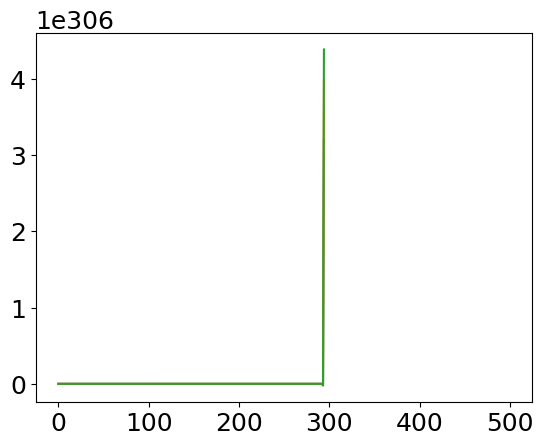

In [154]:
plt.plot(all_xe.T)

In [157]:

y_tilde.shape, model_1_H.shape

((500, 1), (500, 3))

In [214]:

states = np.zeros((len(t), 3))
current_state = np.array([[0,0,0]])

p = np.random.uniform(0, 10, size=(3,3))

for i,time in enumerate(t):
    model =np.array([ [time, np.sin(time), np.cos(2*time)]])
    pinv = np.linalg.inv(p) + np.array(model).T @ np.array(model)
    p = np.linalg.inv(pinv)
    k = p @ np.array(model).T
    next_state = k * (y_tilde[i] - model @ current_state.T) + current_state.T
    states[i,:] = next_state.reshape(-1)
    current_state = next_state.T


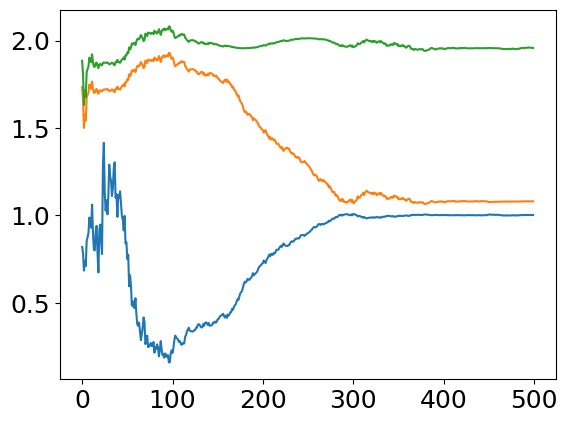

In [217]:
plt.plot(states)

array([[ 1.e+00],
       [ 1.e+00],
       [ 2.e+00],
       [-4.e-05]])